### Classification of MNIST using Convolutional neural network with Keras

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

# build the model
model = convolutional_model()
model.summary()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

(60000, 28, 28) (10000, 28, 28)


d:\Document\BTL\xulianh\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 - 34s - 112ms/step - accuracy: 0.8340 - loss: 1.4898 - val_accuracy: 0.9762 - val_loss: 0.0776
Epoch 2/10
300/300 - 34s - 113ms/step - accuracy: 0.9520 - loss: 0.1678 - val_accuracy: 0.9806 - val_loss: 0.0624
Epoch 3/10
300/300 - 34s - 113ms/step - accuracy: 0.9635 - loss: 0.1288 - val_accuracy: 0.9827 - val_loss: 0.0559
Epoch 4/10
300/300 - 31s - 102ms/step - accuracy: 0.9681 - loss: 0.1084 - val_accuracy: 0.9849 - val_loss: 0.0468
Epoch 5/10
300/300 - 29s - 96ms/step - accuracy: 0.9719 - loss: 0.0952 - val_accuracy: 0.9867 - val_loss: 0.0423
Epoch 6/10
300/300 - 33s - 108ms/step - accuracy: 0.9752 - loss: 0.0828 - val_accuracy: 0.9878 - val_loss: 0.0407
Epoch 7/10
300/300 - 33s - 112ms/step - accuracy: 0.9763 - loss: 0.0794 - val_accuracy: 0.9860 - val_loss: 0.0451
Epoch 8/10
300/300 - 32s - 107ms/step - accuracy: 0.9762 - loss: 0.0760 - val_accuracy: 0.9886 - val_loss: 0.0411
Epoch 9/10
300/300 - 32s - 106ms/step - accuracy: 0.9787 - loss: 0.0682 - val_accuracy: 0

In [ ]:
# pip install pydot_ng ## install pydot_ng if not already installed
import pydot_ng as pydot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='../images/model.png')

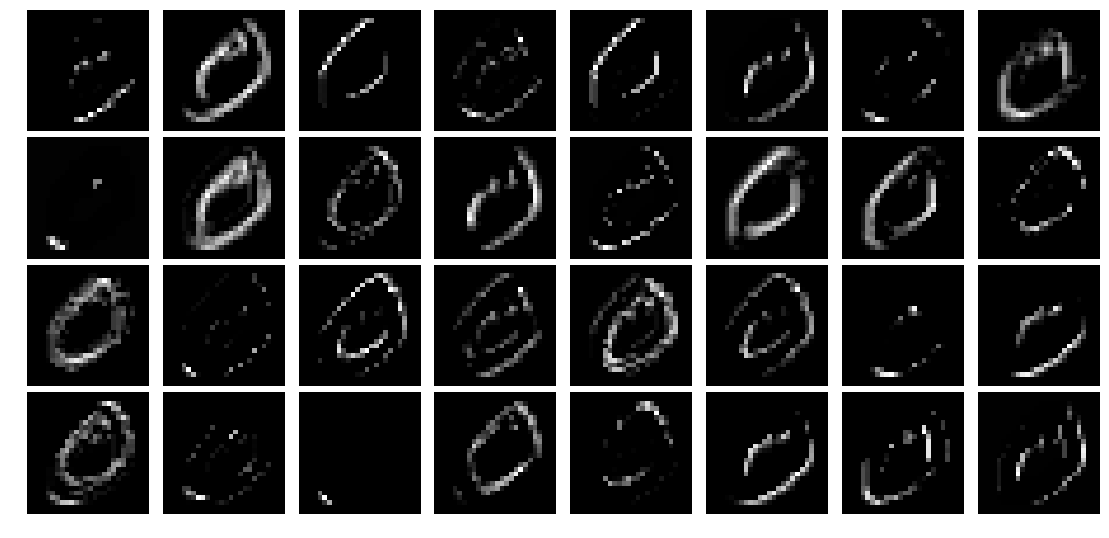

In [10]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np

intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 1 
for c in range(32):
    plt.subplot(4, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

In [11]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

(?, 28, 28, 1) (60000, 24, 24, 64)


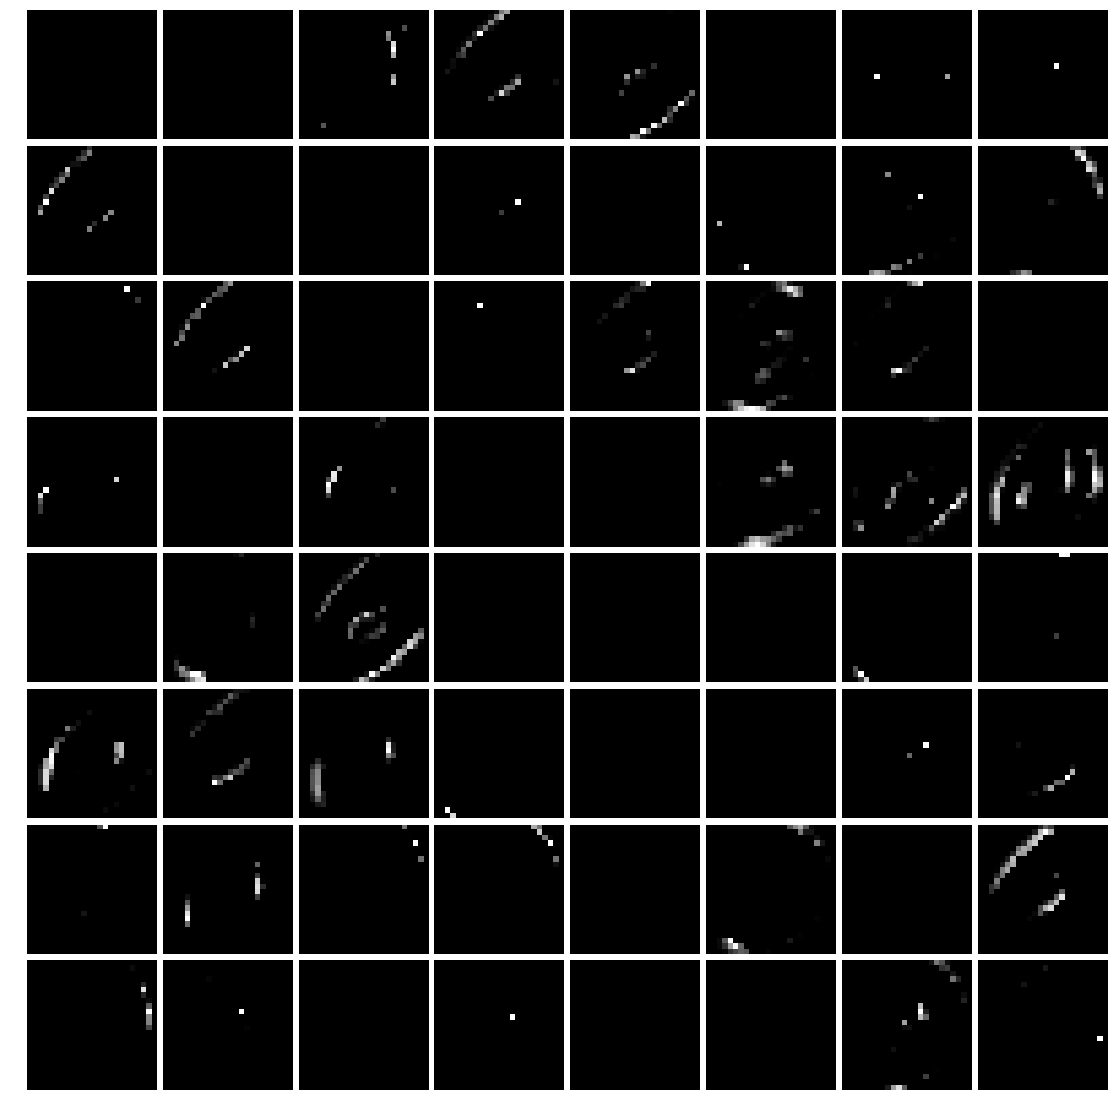

In [15]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 1 
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

### Classification of MNIST using FC network with Keras

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
# (60000, 28, 28) (10000, 28, 28)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

def FC_model():    

    # create model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model = FC_model()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

(60000, 28, 28) (10000, 28, 28)


d:\Document\BTL\xulianh\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,210 (778.16 KB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 - 2s - 7ms/step - accuracy: 0.8994 - loss: 0.3476 - val_accuracy: 0.9555 - val_loss: 0.1477
Epoch 2/10
300/300 - 1s - 4ms/step - accuracy: 0.9593 - loss: 0.1378 - val_accuracy: 0.9673 - val_loss: 0.1034
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9703 - loss: 0.0977 - val_accuracy: 0.9738 - val_loss: 0.0842
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9759 - loss: 0.0756 - val_accuracy: 0.9758 - val_loss: 0.0762
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9808 - loss: 0.0615 - val_accuracy: 0.9777 - val_loss: 0.0705
Epoch 6/10
300/300 - 1s - 4ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accuracy: 0.9795 - val_loss: 0.0711
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9870 - loss: 0.0408 - val_accuracy: 0.9807 - val_loss: 0.0698
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0.9797 - val_loss: 0.0707
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9895 - loss: 0.0318 - val_accuracy: 0.9768 - val_loss: 0.0709
E

In [ ]:
import pydot_ng as pydot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='../images/model.png')

(784, 200) (200, 200)
(784, 10)


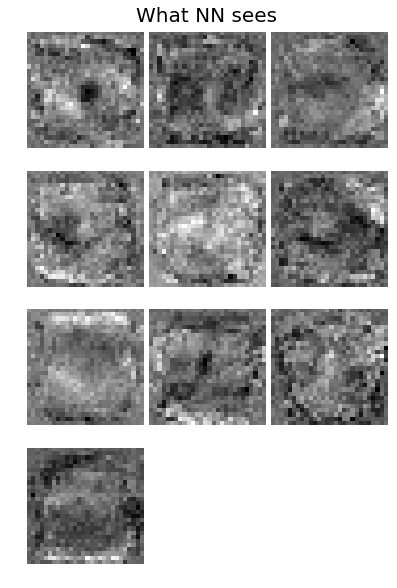

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pylab as plt
import numpy as np
W1 = model.get_layer('dense_7').get_weights()
W2 = model.get_layer('dense_8').get_weights()
W3 = model.get_layer('dense_9').get_weights()
print(W1[0].shape, W2[0].shape)
W = W1[0] @ W2[0] @ W3[0]
print(W.shape)
fig = plt.figure(figsize=(5,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05) 
plt.gray()
for i in range(10):
    plt.subplot(4, 3, i+1), plt.imshow(np.reshape(W[:, i], (28,28))), plt.axis('off')
plt.suptitle('What NN sees', size=20)
plt.show()